In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = 0
integral = 0
time_prev = -1e-6
e_prev = 0

In [3]:
def PID(Kp, Ki, Kd, setpoint, measurement):
    global time, integral, time_prev, e_prev

    # Value of offset - when the error is equal zero
    offset = 320
    
    # PID calculations
    e = setpoint - measurement
        
    P = Kp*e
    integral = integral + Ki*e*(time - time_prev)
    D = Kd*(e - e_prev)/(time - time_prev)

    # calculate manipulated variable - MV 
    MV = offset + P + integral + D
    
    # update stored data for next iteration
    e_prev = e
    time_prev = time
    return MV

In [4]:
def system(t, temp, Tq):
    epsilon = 1
    tau = 4
    Tf = 300
    Q = 2
    dTdt = 1/(tau*(1+epsilon)) * (Tf-temp) + Q/(1+epsilon)*(Tq-temp)
    return dTdt

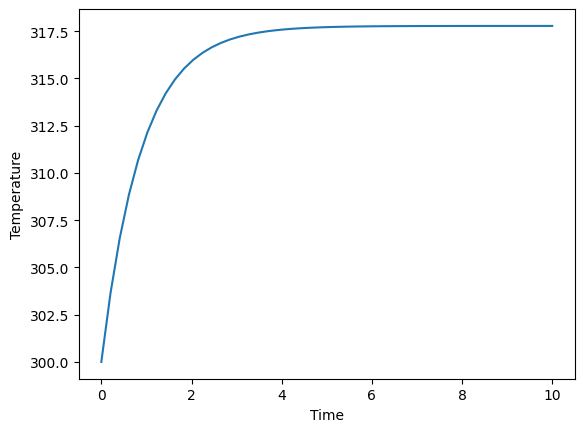

In [5]:
tspan = np.linspace(0,10,50)
Tq = 320,
sol = odeint(system,300, tspan, args=Tq, tfirst=True)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.plot(tspan,sol)